In [2]:
import pandas as pd

df= pd.read_csv('dataset_HR.csv')

In [5]:
df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   SatisfactionLevel    1140 non-null   float64
 1   LastEvaluation       1140 non-null   float64
 2   NumberProjects       1140 non-null   float64
 3   AverageMonthlyHours  1140 non-null   float64
 4   TimeSpentCompany     1140 non-null   float64
 5   WorkAccident         1140 non-null   float64
 6   PromotionLast5Years  1140 non-null   float64
 7   Department           1140 non-null   object 
 8   Salary               1140 non-null   object 
 9   OverTime             1140 non-null   object 
 10  Attrition            1140 non-null   object 
dtypes: float64(7), object(4)
memory usage: 103.2+ KB


,SatisfactionLevel,LastEvaluation,NumberProjects,AverageMonthlyHours,TimeSpentCompany,WorkAccident,PromotionLast5Years
count,1140.000000,1140.000000,1140.000000,1140.000000,1140.000000,1140.000000,1140.000000
mean,0.548459,0.545439,3.992982,204.002632,5.003509,0.494737,0.512281
std,0.267226,0.261558,1.423478,63.841132,2.585498,0.500192,0.500069
min,0.046217,0.030698,2.000000,90.000000,1.000000,0.000000,0.000000
25%,0.310995,0.324442,3.000000,149.000000,3.000000,0.000000,0.000000
50%,0.549400,0.551312,4.000000,208.000000,5.000000,0.000000,1.000000
75%,0.787607,0.758147,5.000000,260.000000,7.000000,1.000000,1.000000
max,1.054639,1.104275,6.000000,309.000000,9.000000,1.000000,1.000000


In [4]:
#We will run a few commands to view the shape and uniqueness of the dataset.
df.shape
df.columns
df.nunique() 

SatisfactionLevel      1140
LastEvaluation         1140
NumberProjects            5
AverageMonthlyHours     217
TimeSpentCompany          9
WorkAccident              2
PromotionLast5Years       2
Department                5
Salary                    3
OverTime                  2
Attrition                 2
dtype: int64

Missing values:
 SatisfactionLevel      60
LastEvaluation         60
NumberProjects         60
AverageMonthlyHours    60
TimeSpentCompany       60
WorkAccident           60
PromotionLast5Years    60
Department             60
Salary                 60
OverTime               60
Attrition              60
dtype: int64


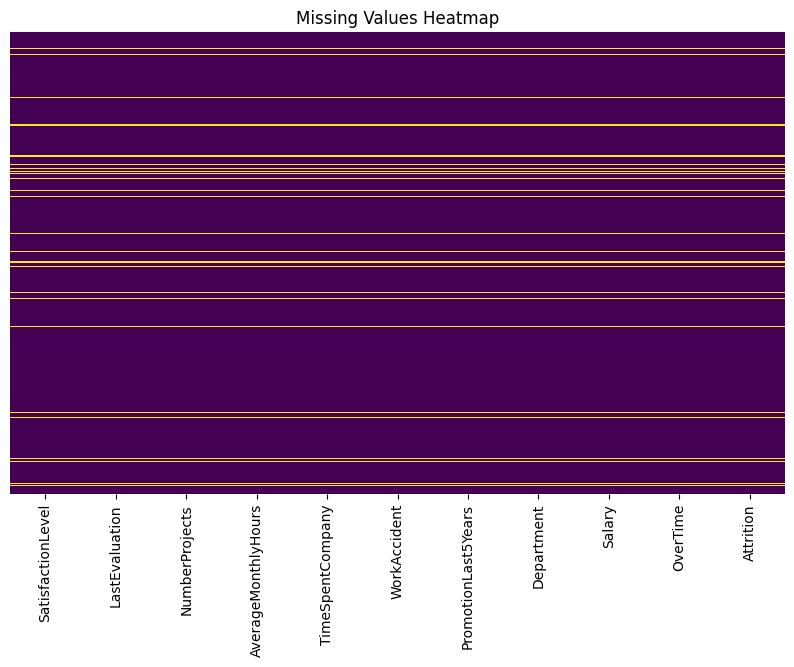

In [5]:
#Now we will Check for missing values and identify any missing data that might need to be handled later.
#This method will give us the number of missing values per column.
import seaborn as sns
import matplotlib.pyplot as plt

#This method will give us the number of missing values per column.
print("Missing values:\n", df.isnull().sum())

# Visual heatmap of missing values to give a better understanding of the values.
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Missing Values Heatmap')
plt.show()

Attrition
No     863
Yes    277
Name: count, dtype: int64


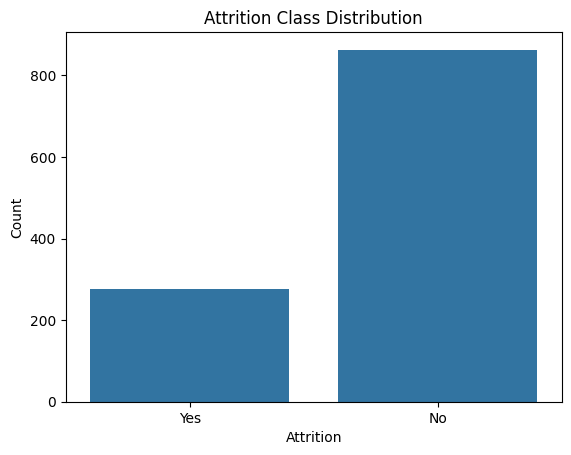

In [6]:
# Drop rows where Attrition is missing
df_clean = df.dropna(subset=['Attrition'])

# Count and plot class distribution
print(df_clean['Attrition'].value_counts())

# we will use sns.countplot to visualize the number of employees who left vs stayed
sns.countplot(data=df_clean, x='Attrition')
plt.title('Attrition Class Distribution')
plt.ylabel('Count')
plt.show()

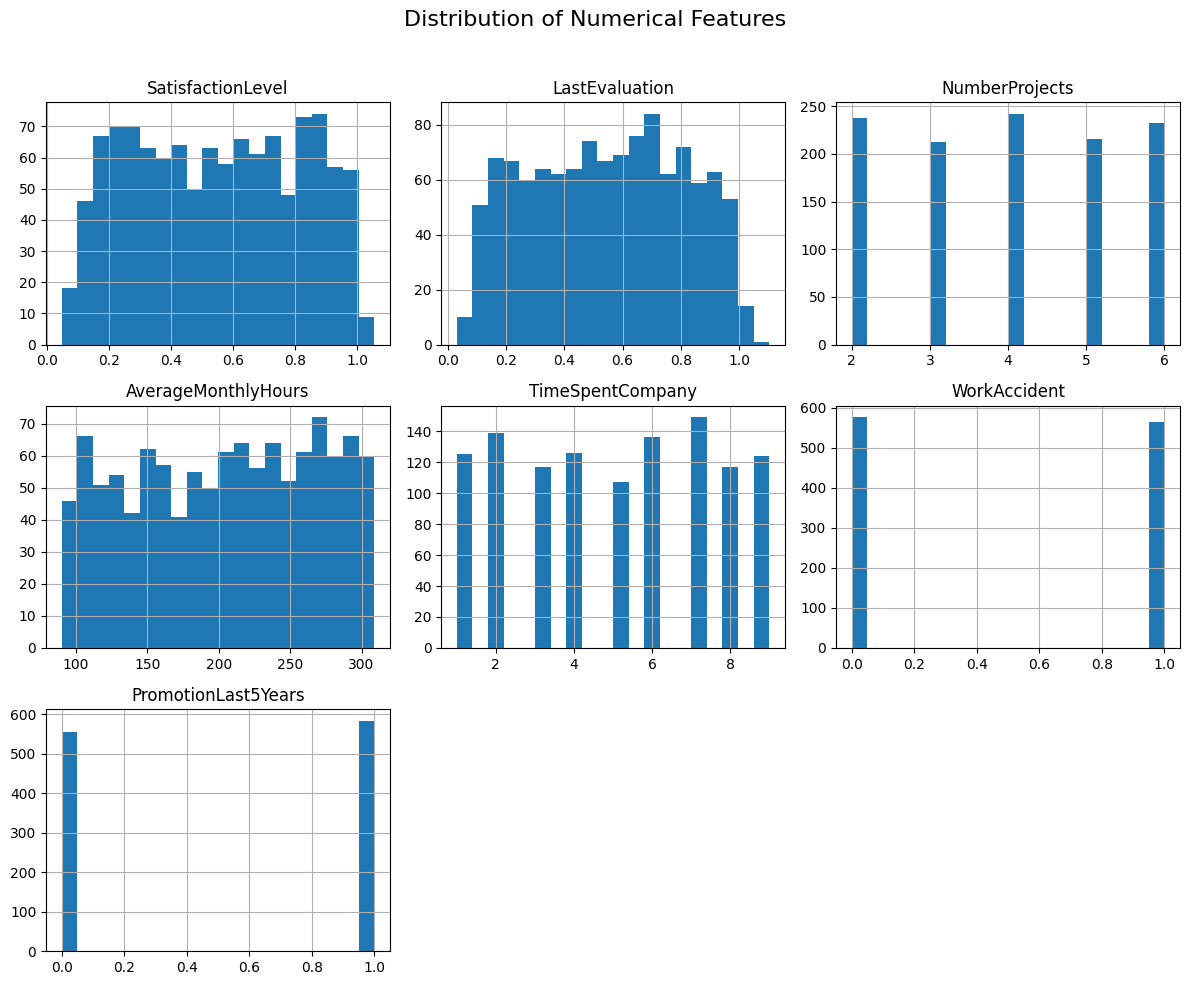

In [7]:
#Understand how numeric columns (like satisfaction level, hours, etc.) are distributed.
# Select numeric columns
numeric_cols = df_clean.select_dtypes(include='number').columns

# Histograms
df_clean[numeric_cols].hist(bins=20, figsize=(12, 10))
plt.suptitle('Distribution of Numerical Features', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

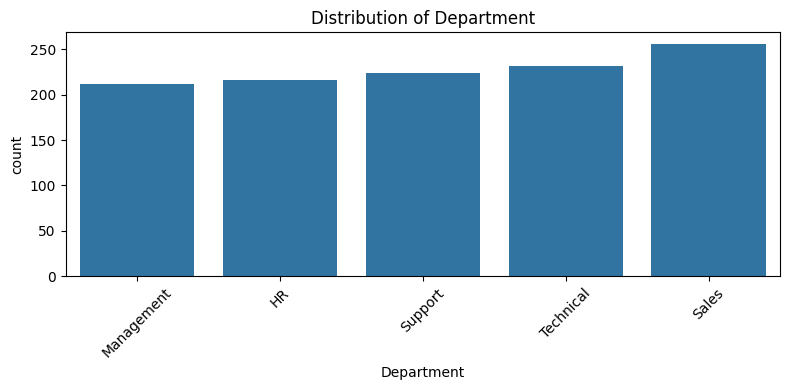

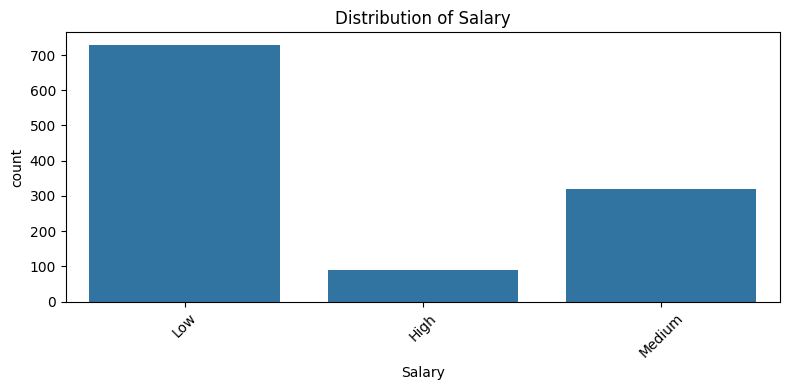

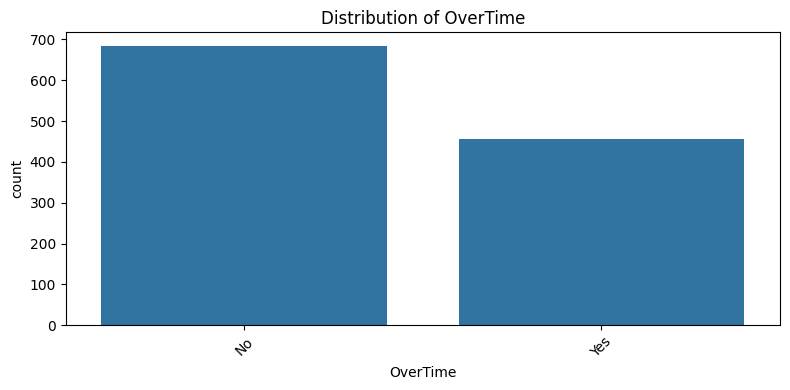

In [8]:
# Analyze frequency of categories (e.g., departments, salary levels)
# Select categorical columns
cat_cols = df_clean.select_dtypes(include='object').columns.drop('Attrition')

# Count plots for each categorical columns
for col in cat_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df_clean, x=col)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
